In [1]:
#Import the required library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Task 1: Load and pre-process the data set (15%)

In [2]:
#Read the csv file into df
#we skip line 3149 and 4821 because there are incorrect data
df = pd.read_csv("winedata.csv", delimiter=";",skiprows = [3148,4820])

In [3]:
#Check the head of the dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.3,0.34,1.6,0.049,14.0,132.0,0.9940000000000001,3.3,0.49,9.5,6
2,8.1,0.28,0.4,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.057999999999999996,47.0,186.0,0.9956,3.19,0.4,9.9,6
4,7.2,0.23,0.32,8.5,0.057999999999999996,47.0,186.0,0.9956,3.19,0.4,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4891 non-null   float64
 1   volatile acidity      4891 non-null   object 
 2   citric acid           4843 non-null   object 
 3   residual sugar        4886 non-null   object 
 4   chlorides             4890 non-null   object 
 5   free sulfur dioxide   4888 non-null   object 
 6   total sulfur dioxide  4889 non-null   object 
 7   density               4890 non-null   object 
 8   pH                    4890 non-null   object 
 9   sulphates             4892 non-null   object 
 10  alcohol               4890 non-null   object 
 11  quality               4892 non-null   object 
dtypes: float64(1), object(11)
memory usage: 459.1+ KB


# • How many wines are included in the data set?
There are 4896 entries in the data set but not every row contains valid data. 
Column fixed acidity has the highest number of Non-Null count 4892, which is most likely the number of wines in the data set.  
The data type of the columns except fixed acidity is object indicate that the other columns contain different data types.

In [5]:
df.describe()

,fixed acidity
count,4891.000000
mean,6.855030
std,0.844023
min,3.800000
25%,6.300000
50%,6.800000
75%,7.300000
max,14.200000


Only column fixed acidity can show the describe summary

In [6]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 883 entries, 4 to 4878
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         880 non-null    float64
 1   volatile acidity      880 non-null    object 
 2   citric acid           878 non-null    object 
 3   residual sugar        880 non-null    object 
 4   chlorides             880 non-null    object 
 5   free sulfur dioxide   880 non-null    object 
 6   total sulfur dioxide  880 non-null    object 
 7   density               880 non-null    object 
 8   pH                    880 non-null    object 
 9   sulphates             880 non-null    object 
 10  alcohol               880 non-null    object 
 11  quality               880 non-null    object 
dtypes: float64(1), object(11)
memory usage: 89.7+ KB


There are 880 duplicated wines in the data set

In [7]:
#Drop all the duplicates rows
df.drop_duplicates(inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4013 entries, 0 to 4895
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4011 non-null   float64
 1   volatile acidity      4011 non-null   object 
 2   citric acid           3965 non-null   object 
 3   residual sugar        4006 non-null   object 
 4   chlorides             4010 non-null   object 
 5   free sulfur dioxide   4008 non-null   object 
 6   total sulfur dioxide  4009 non-null   object 
 7   density               4010 non-null   object 
 8   pH                    4010 non-null   object 
 9   sulphates             4012 non-null   object 
 10  alcohol               4010 non-null   object 
 11  quality               4012 non-null   object 
dtypes: float64(1), object(11)
memory usage: 407.6+ KB


# • Are all the wines unique, and if not, how many unique wines are there?

Not all the wines are unique. 
There are highest number of non-null count are 4012 and therefore there are 4012 unique wines in the data set.

In [9]:
#Show the number of null values in each column
df.isnull().sum()

fixed acidity            2
volatile acidity         2
citric acid             48
residual sugar           7
chlorides                3
free sulfur dioxide      5
total sulfur dioxide     4
density                  3
pH                       3
sulphates                1
alcohol                  3
quality                  1
dtype: int64

In [10]:
#Drop all the row that contains NaN 
df.dropna(axis='rows',inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3954 entries, 0 to 4895
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3954 non-null   float64
 1   volatile acidity      3954 non-null   object 
 2   citric acid           3954 non-null   object 
 3   residual sugar        3954 non-null   object 
 4   chlorides             3954 non-null   object 
 5   free sulfur dioxide   3954 non-null   object 
 6   total sulfur dioxide  3954 non-null   object 
 7   density               3954 non-null   object 
 8   pH                    3954 non-null   object 
 9   sulphates             3954 non-null   object 
 10  alcohol               3954 non-null   object 
 11  quality               3954 non-null   object 
dtypes: float64(1), object(11)
memory usage: 401.6+ KB


In [12]:
#cast the data type of all the columns to float data type
for column in df.columns:
    if column != 'quality': #There is an error when converting quality, we will deal with it later
        df[column] = df[column].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3954 entries, 0 to 4895
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3954 non-null   float64
 1   volatile acidity      3954 non-null   float64
 2   citric acid           3954 non-null   float64
 3   residual sugar        3954 non-null   float64
 4   chlorides             3954 non-null   float64
 5   free sulfur dioxide   3954 non-null   float64
 6   total sulfur dioxide  3954 non-null   float64
 7   density               3954 non-null   float64
 8   pH                    3954 non-null   float64
 9   sulphates             3954 non-null   float64
 10  alcohol               3954 non-null   float64
 11  quality               3954 non-null   object 
dtypes: float64(11), object(1)
memory usage: 401.6+ KB


There is an error when casting the data type of column qualtity. It seems that quality column has data values other than float. 

In [14]:
df["quality"].unique()

array(['6', '5', '7', '8', '4', 'low', 'high', '3', ' ', '9'],
      dtype=object)

There is 'low' and 'high' values in the quality column.

In [15]:
#filter out the rows containing non-numeric data in quality column
filt = pd.to_numeric(df['quality'], errors='coerce').isnull()

df.loc[filt]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
72,6.0,0.27,0.28,4.8,0.063,31.0,201.0,0.99640,3.69,0.71,10.0,low
128,6.1,0.30,0.56,2.8,0.044,47.0,179.0,0.99240,3.30,0.57,10.9,high
171,7.9,0.19,0.45,1.5,0.045,17.0,96.0,0.99170,3.13,0.39,11.0,high
205,6.4,0.21,0.50,11.6,0.042,45.0,153.0,0.99720,3.15,0.43,8.8,low
208,6.8,0.57,0.29,2.2,0.040,15.0,77.0,0.99380,3.32,0.74,10.2,low
...,...,...,...,...,...,...,...,...,...,...,...,...
4724,6.9,0.31,0.33,12.7,0.038,33.0,116.0,0.99540,3.04,0.65,10.4,high
4755,6.0,0.38,0.26,3.5,0.035,38.0,111.0,0.98872,3.18,0.47,13.6,high
4769,6.8,0.27,0.30,13.0,0.047,69.0,160.0,0.99705,3.16,0.50,9.6,high
4775,5.8,0.27,0.40,1.2,0.076,47.0,130.0,0.99185,3.13,0.45,10.3,high


There is only 95 row containing 'low' and 'high' values.
In this assignment, we are not going to handle these data and we will drop them out from the data set. 

In [16]:
#Drop the rows containing 'low' and 'high' values in quality column
df_copy = df.copy()
df = df.drop(df.loc[filt].index, axis=0)

In [17]:
#Cast the data type of quality column to float 
df['quality'] = df['quality'].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3859 entries, 0 to 4895
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3859 non-null   float64
 1   volatile acidity      3859 non-null   float64
 2   citric acid           3859 non-null   float64
 3   residual sugar        3859 non-null   float64
 4   chlorides             3859 non-null   float64
 5   free sulfur dioxide   3859 non-null   float64
 6   total sulfur dioxide  3859 non-null   float64
 7   density               3859 non-null   float64
 8   pH                    3859 non-null   float64
 9   sulphates             3859 non-null   float64
 10  alcohol               3859 non-null   float64
 11  quality               3859 non-null   float64
dtypes: float64(12)
memory usage: 391.9 KB


# • Are there any missing or invalid values in the data?
There are missing values and invalid values in the data.
After cleaning all the missing values and invalid values as well as the duplicated rows, there are 3859 rows of data left.

In [19]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000
mean,6.840723,0.279966,0.334820,5.923076,0.045936,34.956725,137.315885,0.993795,3.195701,0.490417,10.588856,5.855921
std,0.866709,0.102480,0.122431,4.876653,0.023161,17.253089,43.094708,0.002913,0.151595,0.113336,1.215179,0.890578
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,10.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,107.000000,0.991600,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,8.850000,0.050000,45.000000,166.000000,0.995720,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# • Is the scale of the different attributes approximately equal?
The scale of different attributes are not equal. 
We can see that the scale of total sulfur dioxide is from 10 to 440 while the scale of density is from 0.002913 to 1.03898. 

# Task 2: Visualise the data (15%)
We will plot the frequency histograms of each at-
tribute in the data set below.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

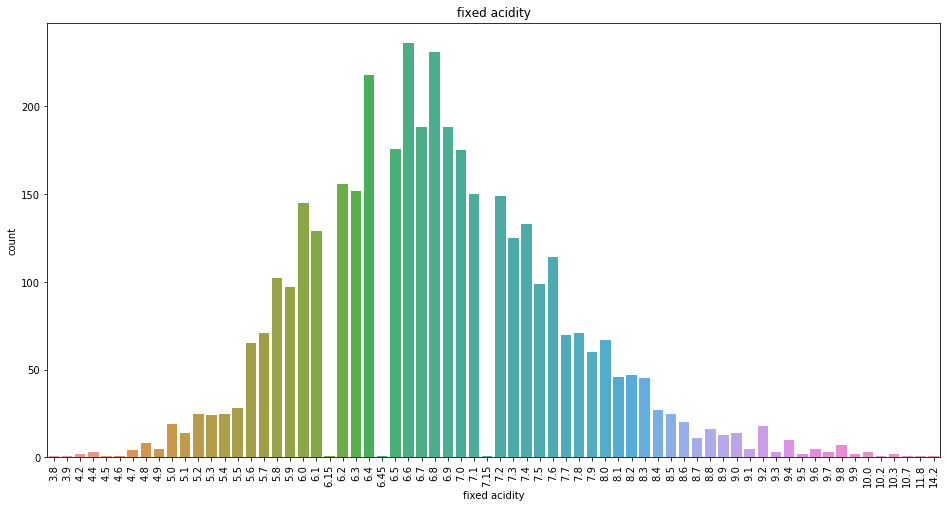

<Figure size 432x288 with 0 Axes>

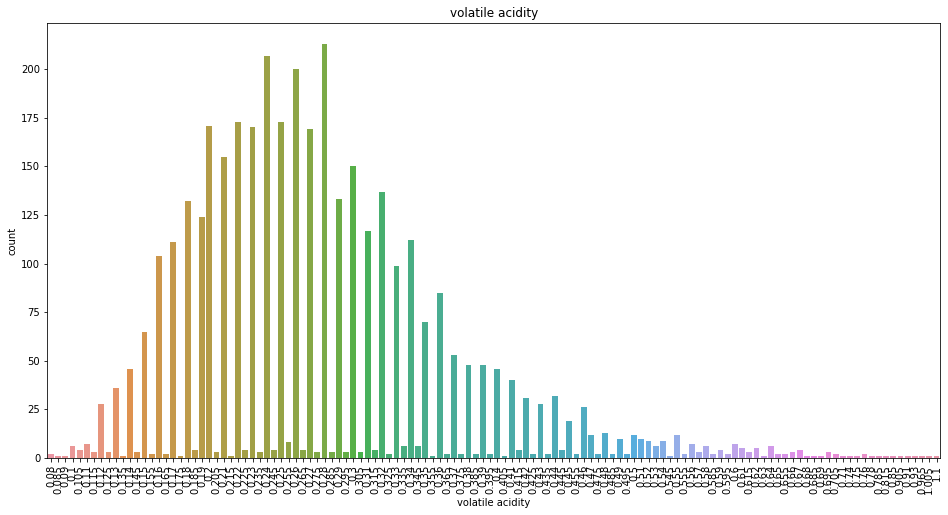

<Figure size 432x288 with 0 Axes>

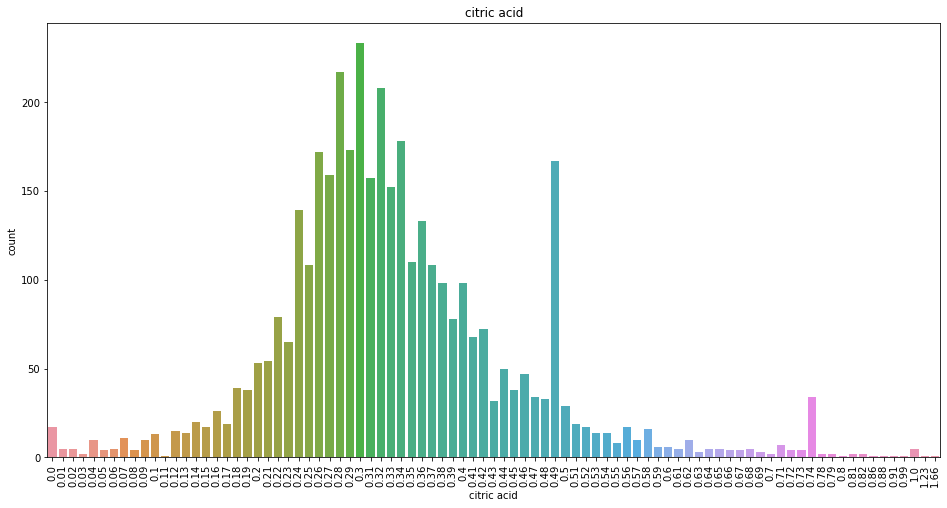

<Figure size 432x288 with 0 Axes>

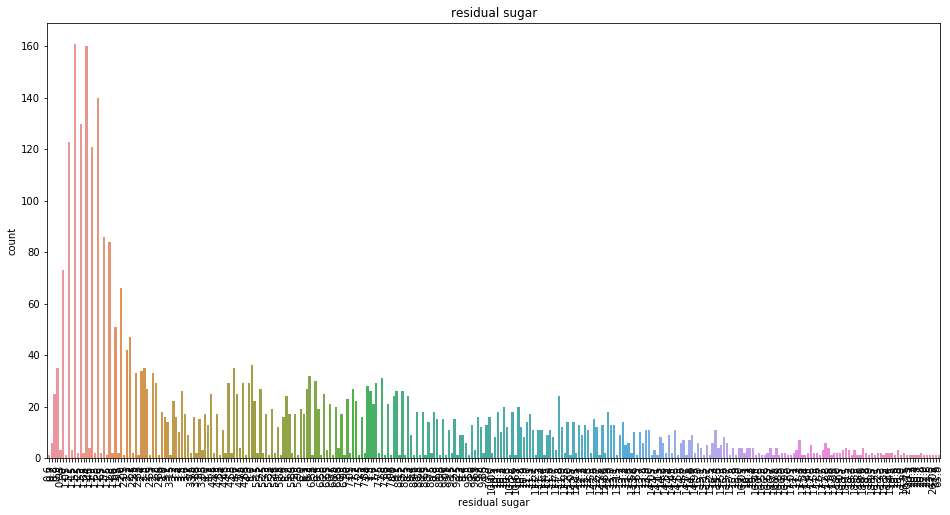

<Figure size 432x288 with 0 Axes>

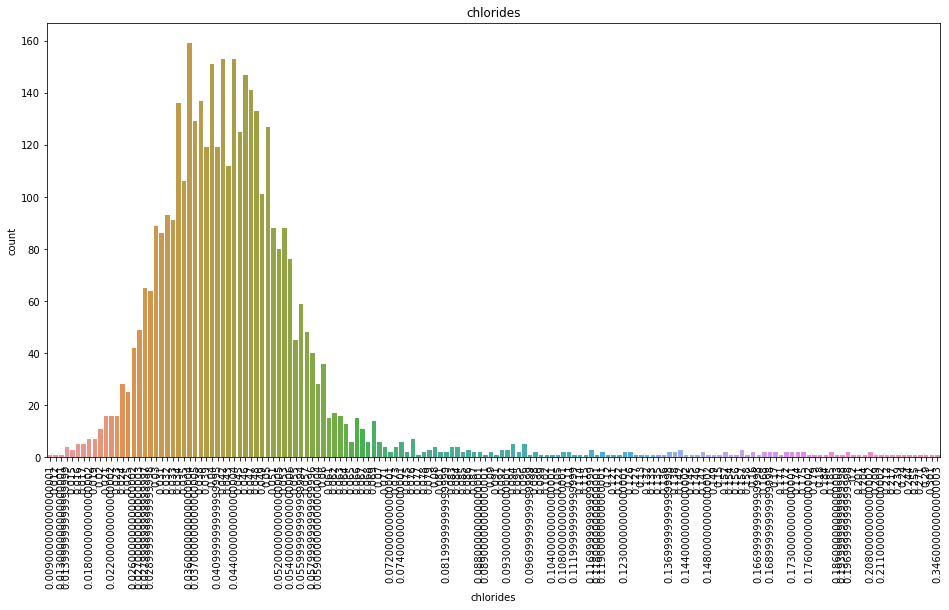

<Figure size 432x288 with 0 Axes>

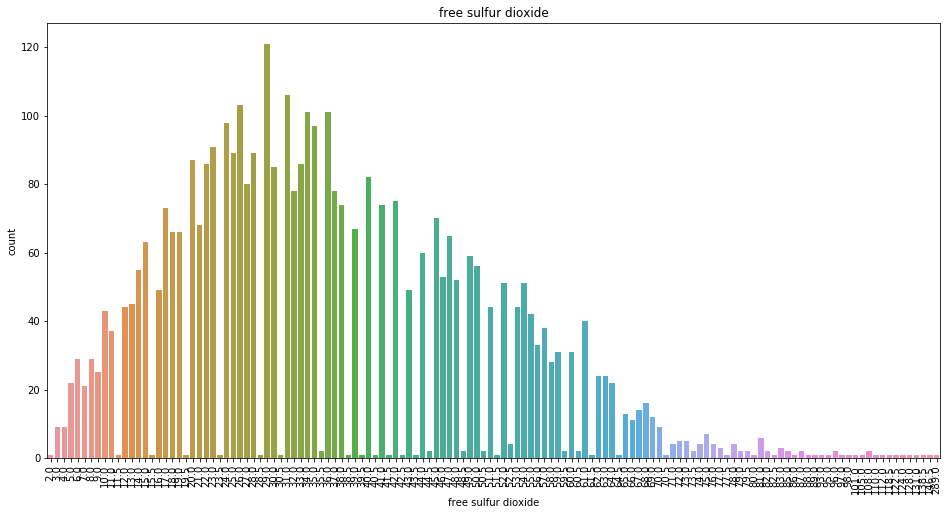

<Figure size 432x288 with 0 Axes>

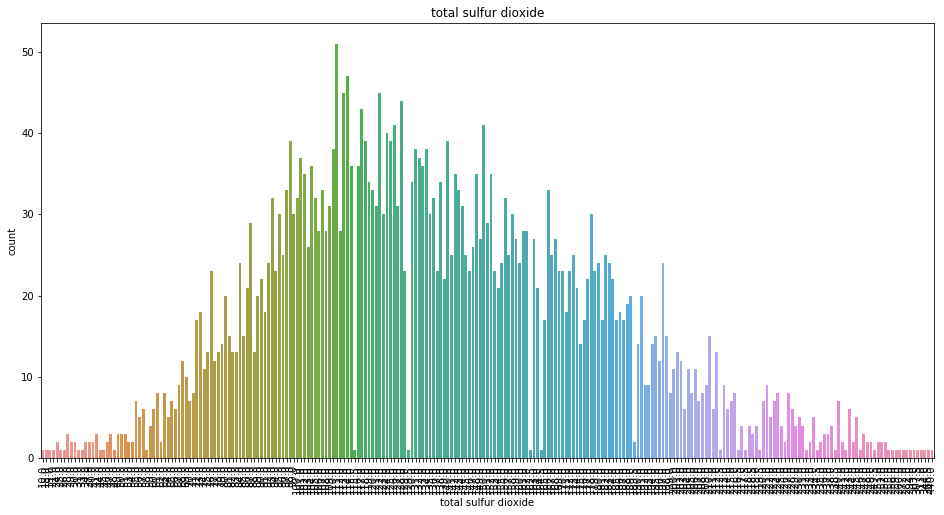

<Figure size 432x288 with 0 Axes>

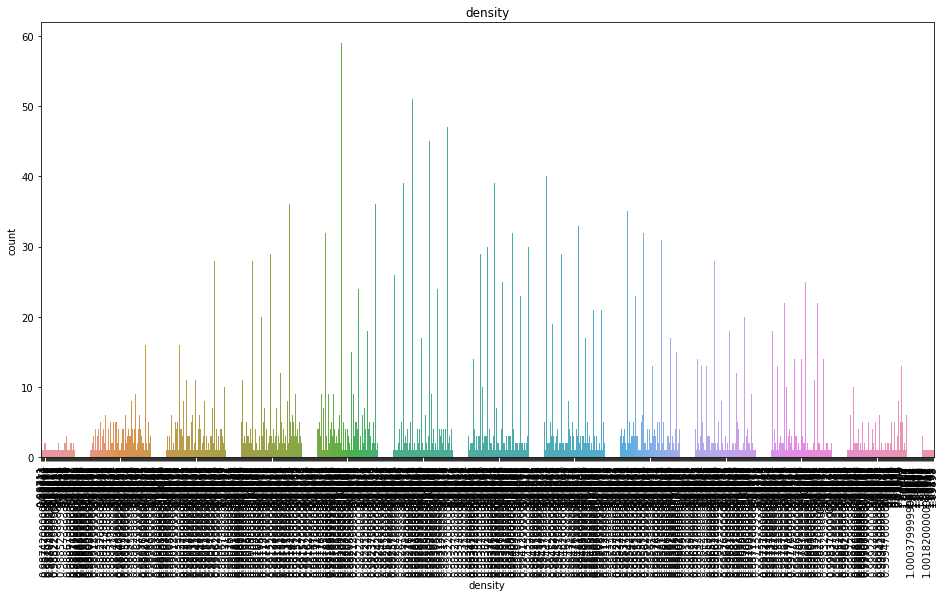

<Figure size 432x288 with 0 Axes>

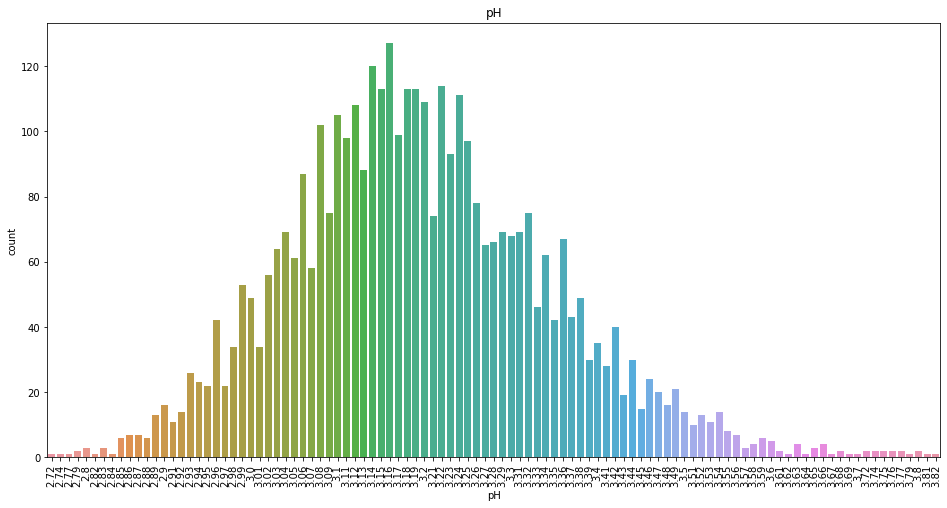

<Figure size 432x288 with 0 Axes>

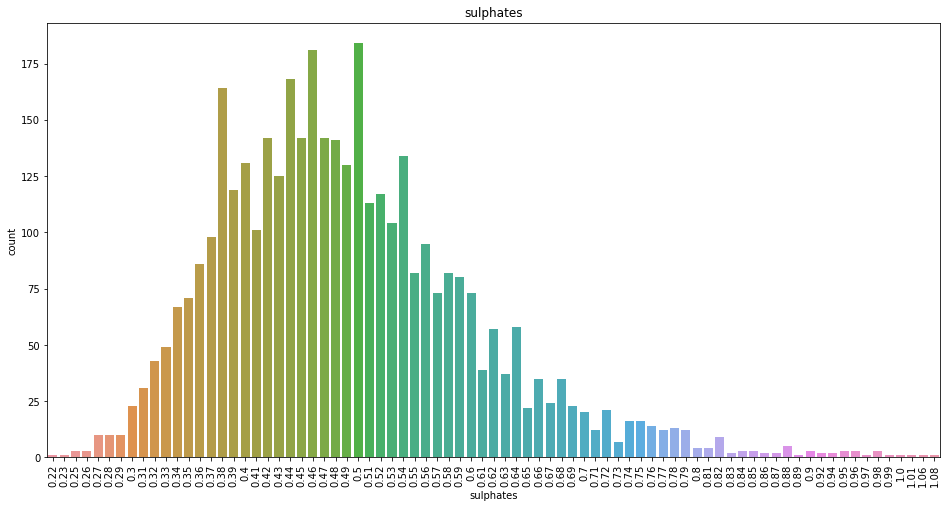

<Figure size 432x288 with 0 Axes>

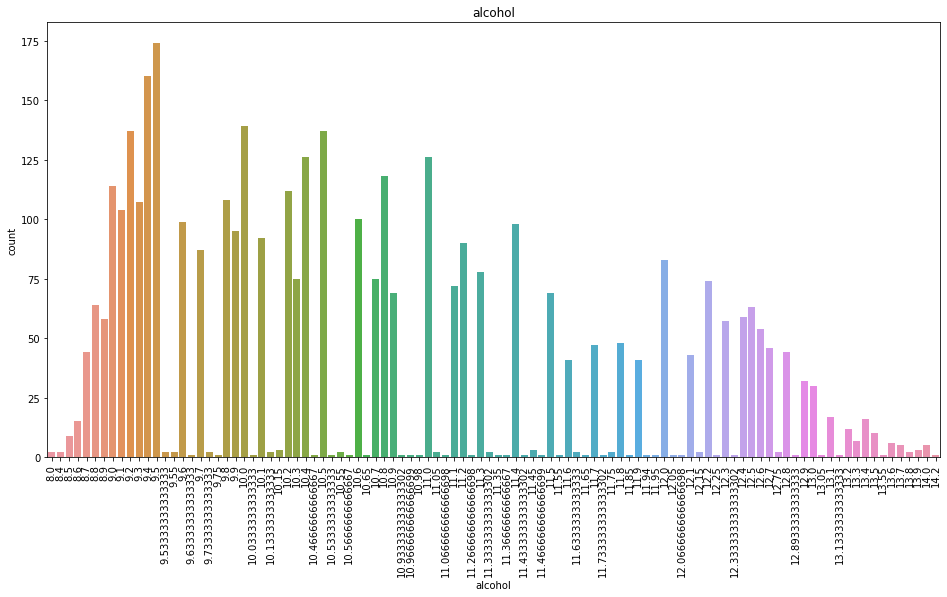

<Figure size 432x288 with 0 Axes>

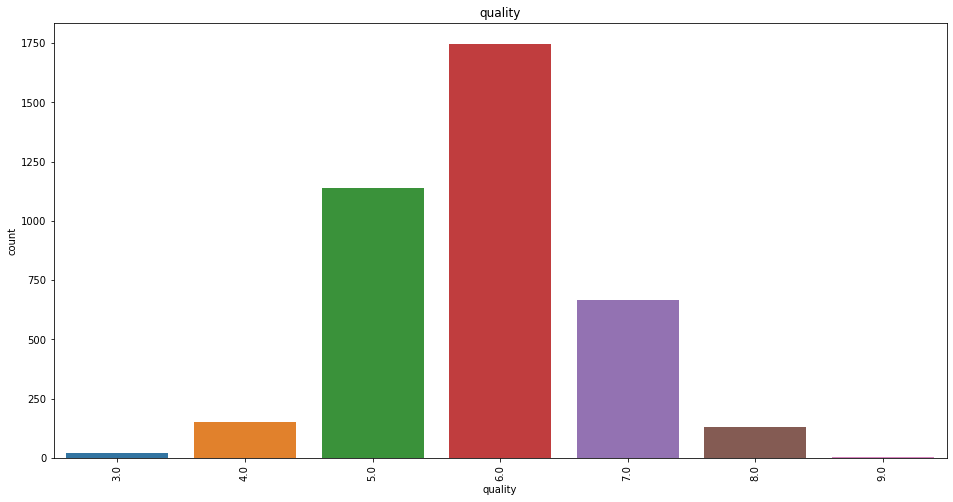

In [20]:
for i, var in enumerate(df.columns):
    plt.figure()
    fig, ax = plt.subplots(figsize=(16,8))
    g = sns.countplot(df[var],ax=ax)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    g.set_title(var)

# Display the histograms in your notebook and comment on what you observe.

All the attributes except quality show a positively skewed distribution and the data are skewed to the right.
Their(except quality) mean values are higher than their median. 
For quality, most of the data are cluster in around the mean(5.855) and therefore it is close to a normal distribution. 

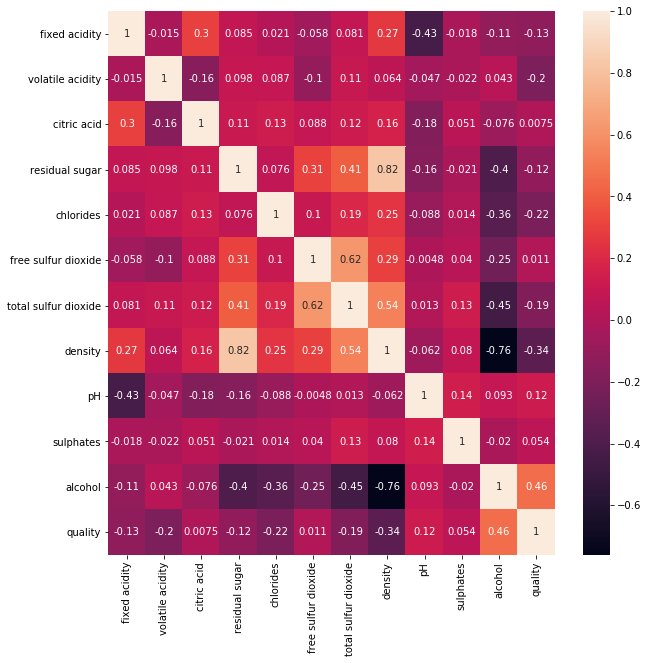

In [21]:
plt.figure(figsize = (10,10))
Var_Corr = df.corr()
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

# 2. 
Calculate the correlation of each other attribute with quality. Which 3 attributes are most correlated with quality? For each of these 3 attributes, display a
scatter plot of that attribute against quality. Comment on what you observe.

In the heat map, we can see that alcohol(0.46),density(-0.34) and chlorides(-0.22) are most correlated with quality. 
We will plot the scatter plot with respect to these 3 attributes below.

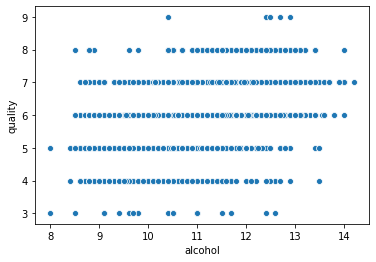

In [22]:
sns.scatterplot('alcohol', 'quality', data=df[['alcohol','quality']])

The graph shows a positively correlation as the data points with higher quality tend to have higher alcohol content.  

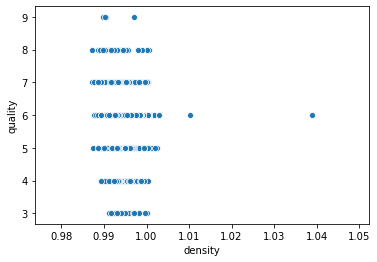

In [23]:
sns.scatterplot('density', 'quality', data=df[['density','quality']])

Although the correlation of density and quality is -0.34, the graph does not really show much about the negative correlation. But we can see that most of the density of the data point are located around 0.99 and 1.00 no matter what quality they are. 

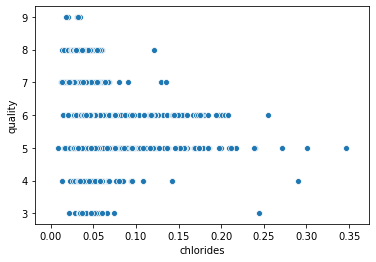

In [24]:
sns.scatterplot('chlorides', 'quality', data=df[['chlorides','quality']])

Although the correlation of density and quality is -0.22, the graph does not really show much about the negative correlation.The graph shows that the chlorides has a normal distribution with the quality. For the wines with quality 5 and 6 have a high variety of content of chlorides, and the wines with high and low quality tend to have low content of chlorides. 

# Task 3: Predicting wine quality: baseline (15%)

In [25]:
# We seperate the quality to from the target set
# X is the training features set and y is the target set

X = df.drop(['quality'],axis = 1)
y = df['quality']

In [26]:
# We seperate the data set into train set and test set using the sklearn medol train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state = 40)

# 1. What is the rmse for this predictor, when trained and tested on the training set?

In [27]:
from sklearn.metrics import mean_squared_error
from math import sqrt

y_median = np.full((y_train.count(),1),y_train.median())

mse = mean_squared_error(y_train,y_median)
rmse = sqrt(mse)
print(f'The root mean square error is:{rmse}')

The root mean square error is:0.9009946632583096


# 2. 
Why do we use regression rather than classification to predict quality? Would there be any advantages to treating this as a classification problem instead? Explain your answer.

Although the data in quality column are discreted, they are numerical and in ascending order(3<4<...<8<9). Therefore, regression is more preferable in this case.
If the quality labels do not mean that higher score is better and lower score is worse, then it is better to treat this as a classification problem instead because it can catagorize the wines instead of rating the wines. 

In [28]:

y_median = np.full((y_test.count(),1),y_test.median())

test_mse = mean_squared_error(y_test,y_median)
test_rmse = sqrt(test_mse)
print(test_rmse)

0.9062248745847038


# 1. The rmse obtained using each model on the training data

For LinearRegression,rmse = 0.7442493808560512


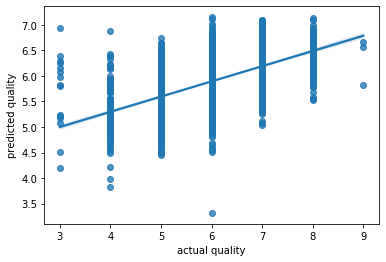

In [29]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train,y_train)
y_pred = regression_model.predict(X_train)
rmse = sqrt(mean_squared_error(y_train,y_pred))
print(f'For LinearRegression,rmse = {rmse}')

plot_df = pd.DataFrame.from_dict(data = {'actual quality': y_train, 'predicted quality': y_pred})
sns.regplot('actual quality', 'predicted quality', data = plot_df)

For LinearRegression,rmse = 0.749811605539049


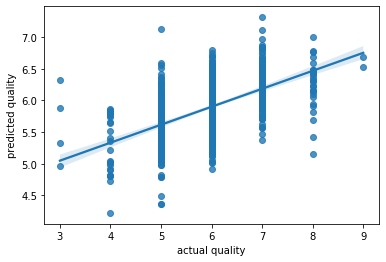

In [30]:
y_pred = regression_model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test,y_pred))
print(f'For LinearRegression,rmse = {rmse}')

plot_df = pd.DataFrame.from_dict(data = {'actual quality': y_test, 'predicted quality': y_pred})
sns.regplot('actual quality', 'predicted quality', data = plot_df)

The predictions around quality 6 are very close whlist the predictions on the 3,4 and 8,9 deviate a lot. I think the reason is that most of our data points have the quality with 5, 6, 7 but only a little of them with 3,4,8,9. Therefore, the predictions cluster at the center and have a heavier weighting around center(5,6,7) rather than the edge(3,4,8,9)

For KNeighborsClassifier and k = 2,
rmse = 0.7599890882888439
For KNeighborsClassifier and k = 3,
rmse = 0.8925055997280003
For KNeighborsClassifier and k = 4,
rmse = 0.8711999253958406
For KNeighborsClassifier and k = 5,
rmse = 0.8582758951221432


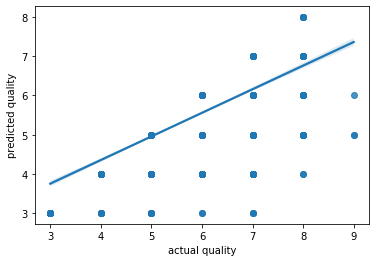

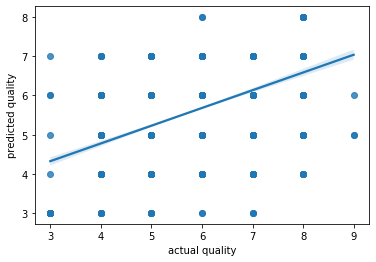

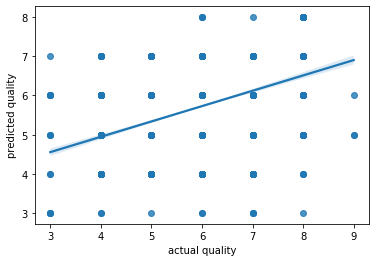

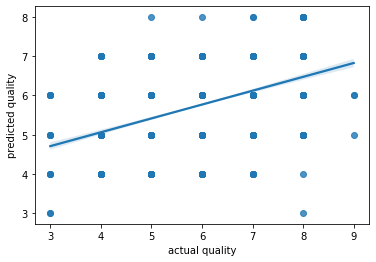

In [31]:
from sklearn.neighbors import KNeighborsClassifier


for k in range(2,6):
    classifier_model = KNeighborsClassifier(n_neighbors=k)
    classifier_model.fit(X_train,y_train)
    y_pred = classifier_model.predict(X_train)
    rmse = sqrt(mean_squared_error(y_train,y_pred))
    print(f'For KNeighborsClassifier and k = {k},\nrmse = {rmse}')
    
    chart, ax1 = plt.subplots()
    plot_df = pd.DataFrame.from_dict(data = {'actual quality': y_train, 'predicted quality': y_pred})
    sns.regplot('actual quality', 'predicted quality', data = plot_df)

The regression lines tend to flatten and rmse increses as the k increased. 
When k increased, the classifer considers more nearest data points and it clusters the predictions to the center and flatten the lines because there are more data points around the center(5,6,7) instead of the edge(3,4,8,9)
Therefore, increasing k is not reducing the rmse. 

For DecisionTreeRegressor,rmse = 0.0


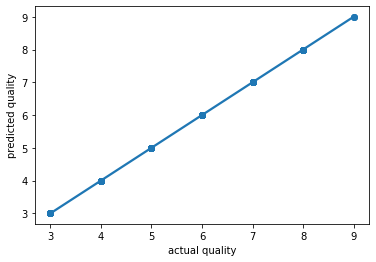

In [32]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor().fit(X_train,y_train)
y_pred = tree_regressor.predict(X_train)
rmse = sqrt(mean_squared_error(y_train,y_pred))
print(f'For DecisionTreeRegressor,rmse = {rmse}')

plot_df = pd.DataFrame.from_dict(data = {'actual quality': y_train, 'predicted quality': y_pred})
sns.regplot('actual quality', 'predicted quality', data = plot_df)

Overfitting is happening in this graph.
Decision tree regressor is too powerful that it captures the features too well and completely fitted in the training set. The model does not generalize well. 

In [33]:
# import the cross valiadate function
from sklearn.model_selection import cross_validate
from statistics import mean

regression_model = LinearRegression()
cv_linear = cross_validate(regression_model,X_train,y_train,cv=10)
print(f'This is the cross validation score of Linear regression:')
print(cv_linear['test_score'])
mean_csv = mean(cv_linear['test_score'])
print(f'This is the mean of the cross validation score: {mean_csv}')

This is the cross validation score of Linear regression:
[0.31173246 0.31460434 0.30798978 0.2545359  0.0790846  0.31841695
 0.25721088 0.33832276 0.31527155 0.32281597]
This is the mean of the cross validation score: 0.28199851945976484


The cross validation score of Linear regression is using the coefficient of determination R^2. 
If the score is close to 1, then the prediction of the model is good. 
The average of the cross validation score of 10 fold is just 0.28 which is not close to 1. 
Therefore, the model does not have a very good prediction on the training data.

In [34]:
for k in range(2,6):
    classifier_model = KNeighborsClassifier(n_neighbors=k)

    cv_classifier = cross_validate(classifier_model,X_train,y_train,cv=10)
    print(f'For KNeighborsClassifier and k = {k},')
    print(f'This is the cross validation score of Knn Classifier:')
    print(cv_classifier['test_score'])
    mean_csv = mean(cv_classifier['test_score'])
    print(f'This is the mean of the cross validation score: {mean_csv}')
    print('\n')

For KNeighborsClassifier and k = 2,
This is the cross validation score of Knn Classifier:
[0.39158576 0.42394822 0.41423948 0.33009709 0.42394822 0.39805825
 0.4433657  0.33766234 0.38961039 0.42207792]
This is the mean of the cross validation score: 0.3974593367797251




/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


For KNeighborsClassifier and k = 3,
This is the cross validation score of Knn Classifier:
[0.41747573 0.41747573 0.37864078 0.38511327 0.39805825 0.39482201
 0.39805825 0.35714286 0.40584416 0.37012987]
This is the mean of the cross validation score: 0.3922760896061867


For KNeighborsClassifier and k = 4,
This is the cross validation score of Knn Classifier:
[0.46925566 0.41100324 0.41747573 0.42071197 0.41100324 0.38511327
 0.44012945 0.37012987 0.44155844 0.41558442]
This is the mean of the cross validation score: 0.41819652839070315




/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


For KNeighborsClassifier and k = 5,
This is the cross validation score of Knn Classifier:
[0.48220065 0.4433657  0.41747573 0.43365696 0.42071197 0.41100324
 0.46601942 0.40584416 0.43506494 0.4025974 ]
This is the mean of the cross validation score: 0.4317940150464422




The cross validation score of KNeighborsClassifier is using the mean accuracy. 
The average of the cross validation score is around 0.4 on different k values which means that the prediction has only 40% accuracy. 
Therefore, the model does not have a good prediction on the training data.

In [35]:
tree_regressor = DecisionTreeRegressor().fit(X_train,y_train)
cv_tree = cross_validate(tree_regressor,X_train,y_train,cv=10)
print(f'This is the cross validation score of Decision Tree Regressor:')
print(cv_tree['test_score'])
mean_csv = mean(cv_tree['test_score'])
print(f'This is the mean of the cross validation score: {mean_csv}')


This is the cross validation score of Decision Tree Regressor:
[-0.30271214 -0.6466593  -0.13621236 -0.11099141 -0.40552834 -0.42705266
 -0.16682881 -0.14227788 -0.17980413 -0.09307102]
This is the mean of the cross validation score: -0.26111380441641935


The cross validation score of Decision Tree Regressor is using the coefficient of determination R^2. 
The average of the cross validation score is negative value which means the square error of y_line is very high. 
Therefore, the model has a very bad prediction on the training data.

For the above model, I think Linear regression is the most suitable model because it has the lowest rmse and position cross validation score. 

# Task 6: Free choice! (15%)
Since the training features are skewed to the right, here I try to reduce the skewness of the data set. 
I dicide to take several method including logarithm, square root, cube root and normalization. 
Then we will run the linear regression again and see the result.

In [36]:
#make a copy of a new dataframe
df_log = df.copy()

#we ignore the division by zero error since we have no zero value in the data set
np.seterr(divide = 'ignore')
#take log for each feature column except the target column
for column in df.columns:
    if column != 'quality':
        df_log[column] = np.where(df_log[column]!=0, np.log(df_log[column]), 0)

In [37]:
df_log

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1.945910,-1.309333,-1.021651,3.030134,-3.101093,3.806662,5.135798,0.001000,1.098612,-0.798508,2.174752,6.0
1,1.840550,-1.203973,-1.078810,0.470004,-3.015935,2.639057,4.882802,-0.006018,1.193922,-0.713350,2.251292,6.0
2,2.091864,-1.272966,-0.916291,1.931521,-2.995732,3.401197,4.574711,-0.004912,1.181727,-0.820981,2.312535,6.0
3,1.974081,-1.469676,-1.139434,2.140066,-2.847312,3.850148,5.225747,-0.004410,1.160021,-0.916291,2.292535,6.0
6,1.824549,-1.139434,-1.832581,1.945910,-3.101093,3.401197,4.912655,-0.005113,1.156881,-0.755023,2.261763,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4891,1.824549,-1.560648,-1.237874,0.470004,-3.244194,3.178054,4.521789,-0.008899,1.184790,-0.693147,2.415914,6.0
4892,1.887070,-1.139434,-1.021651,2.079442,-3.057608,4.043051,5.123964,-0.005113,1.147402,-0.776529,2.261763,5.0
4893,1.871802,-1.427116,-1.660731,0.182322,-3.194183,3.401197,4.709530,-0.007488,1.095273,-0.776529,2.240710,6.0
4894,1.704748,-1.237874,-1.203973,0.095310,-3.816713,2.995732,4.700480,-0.011374,1.205971,-0.967584,2.549445,7.0


In [38]:
df_log.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000,3859.000000
mean,1.915076,-1.332057,-1.152928,1.402374,-3.150687,3.419989,4.869057,-0.006229,1.160693,-0.737683,2.353352,5.855921
std,0.124651,0.339518,0.409279,0.910697,0.341564,0.557557,0.339889,0.002926,0.047090,0.222726,0.113081,0.890578
min,1.335001,-2.525729,-4.605170,-0.510826,-4.710531,0.693147,2.302585,-0.012974,1.000632,-1.514128,2.079442,3.000000
25%,1.840550,-1.560648,-1.309333,0.470004,-3.352407,3.135494,4.672829,-0.008435,1.128171,-0.891598,2.251292,5.000000
50%,1.916923,-1.347074,-1.139434,1.547563,-3.170086,3.496508,4.890349,-0.006521,1.156881,-0.733969,2.341806,6.000000
75%,1.987874,-1.139434,-0.941609,2.180401,-2.995732,3.806662,5.111988,-0.004289,1.190888,-0.597837,2.433613,6.000000
max,2.653242,0.095310,0.506818,4.186620,-1.061317,5.666427,6.086775,0.038239,1.340250,0.076961,2.653242,9.000000


After taking logarithm, the value range of the features reduces. 
We will plot the histogram again to see the distribution. 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

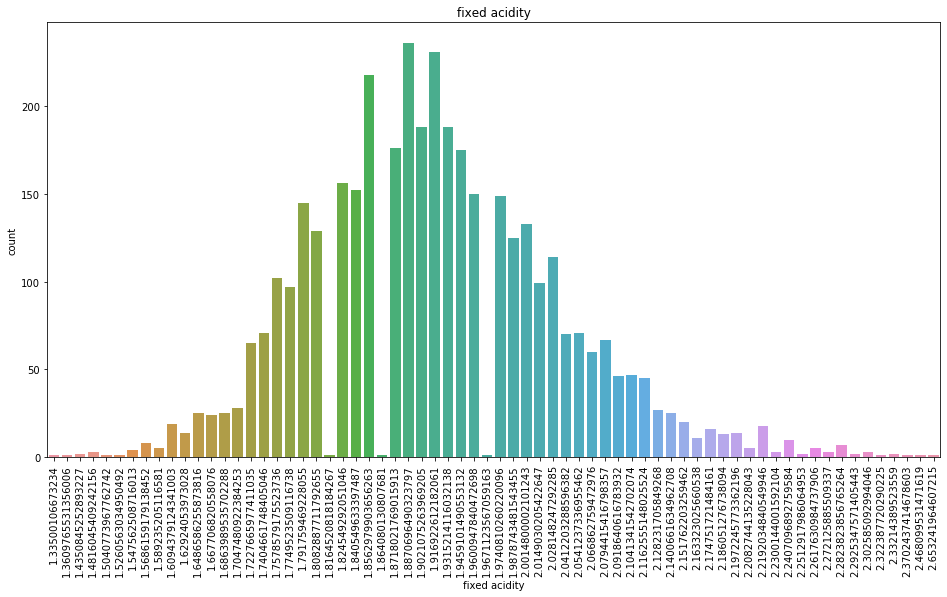

<Figure size 432x288 with 0 Axes>

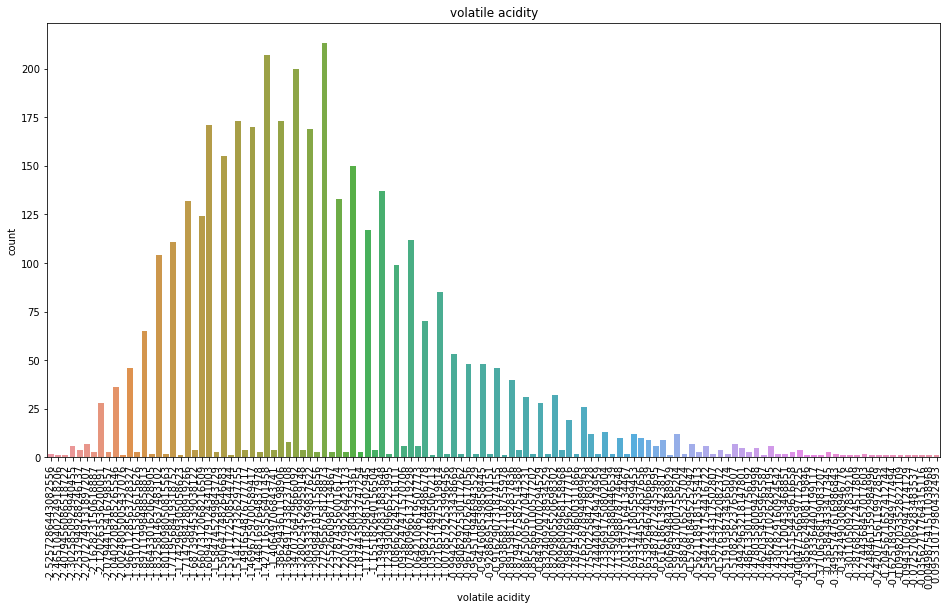

<Figure size 432x288 with 0 Axes>

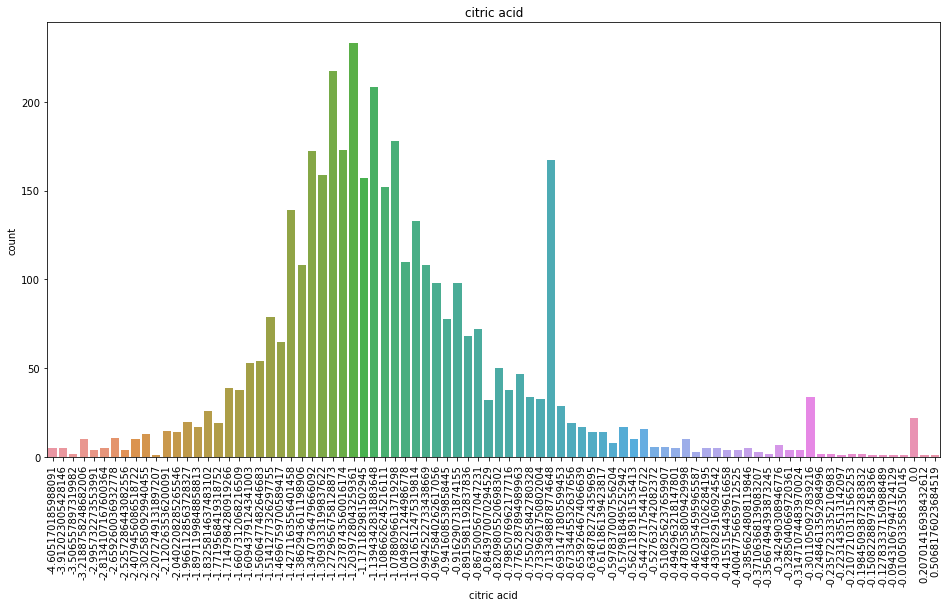

<Figure size 432x288 with 0 Axes>

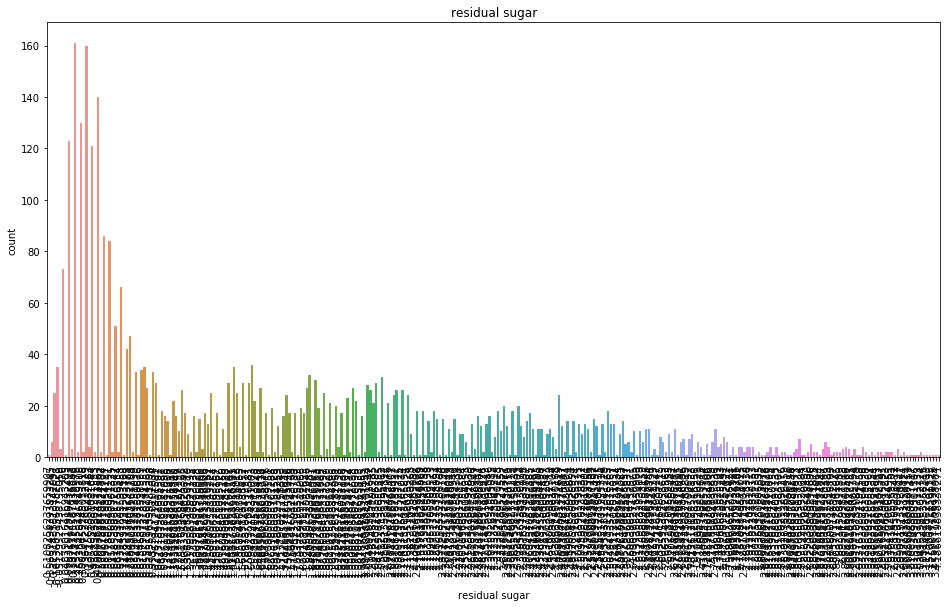

<Figure size 432x288 with 0 Axes>

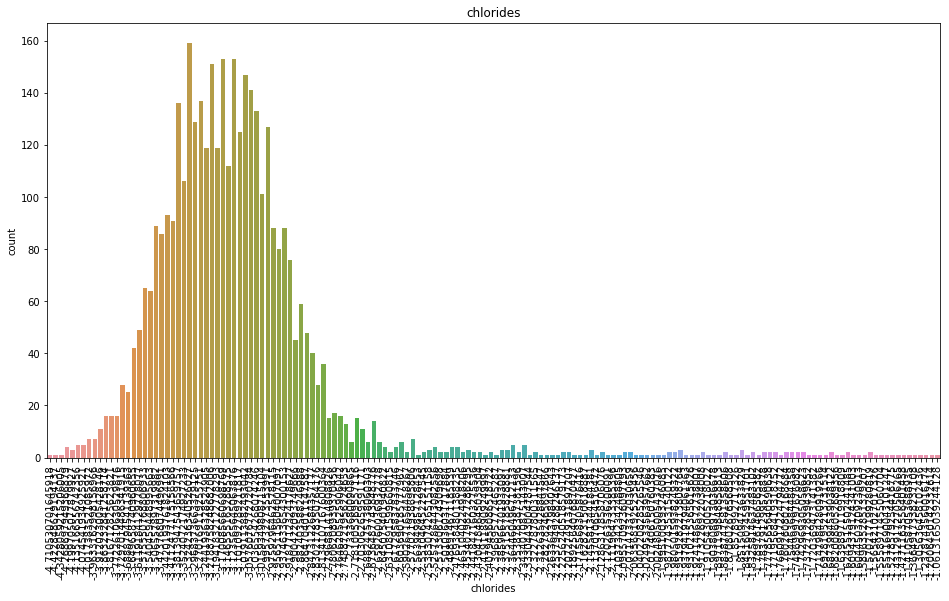

<Figure size 432x288 with 0 Axes>

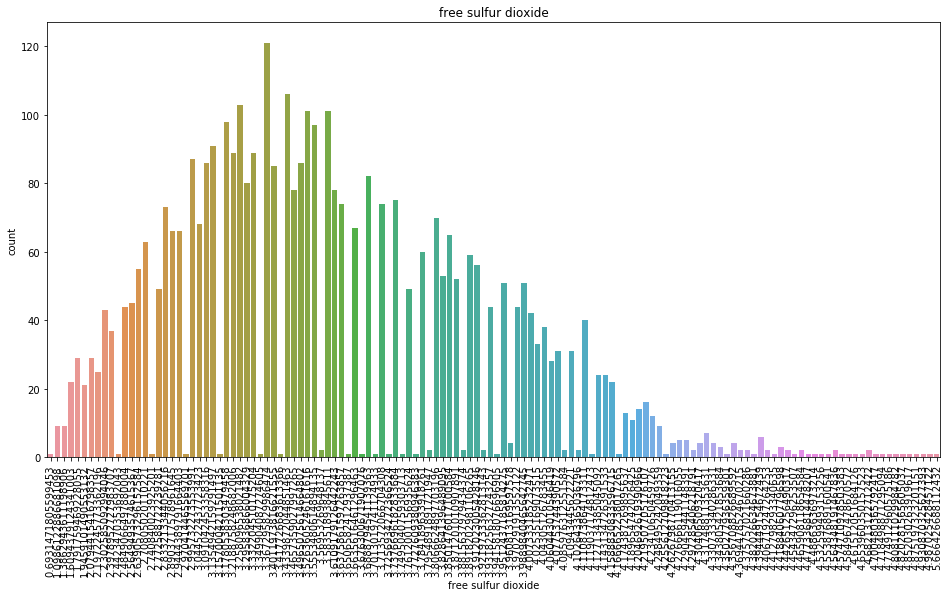

<Figure size 432x288 with 0 Axes>

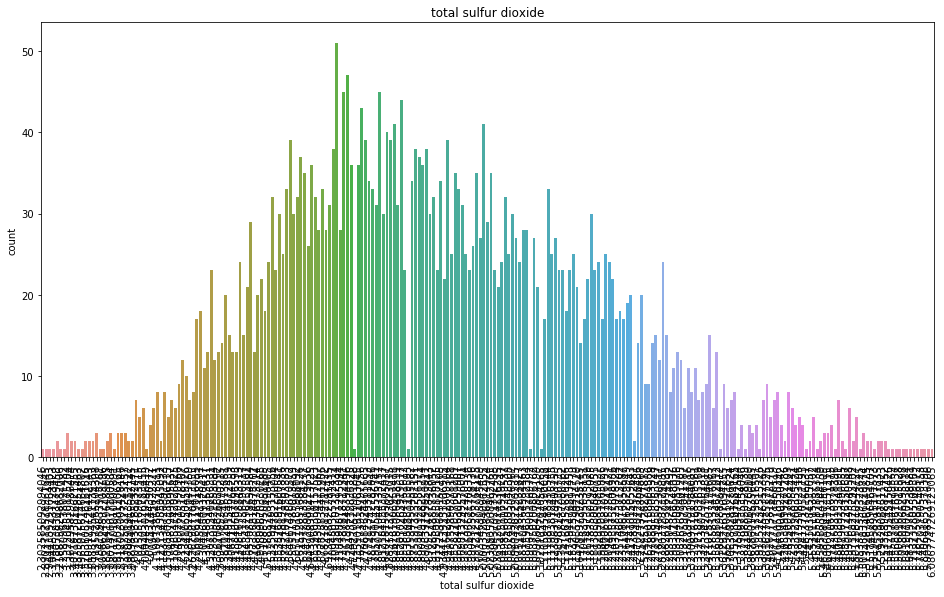

<Figure size 432x288 with 0 Axes>

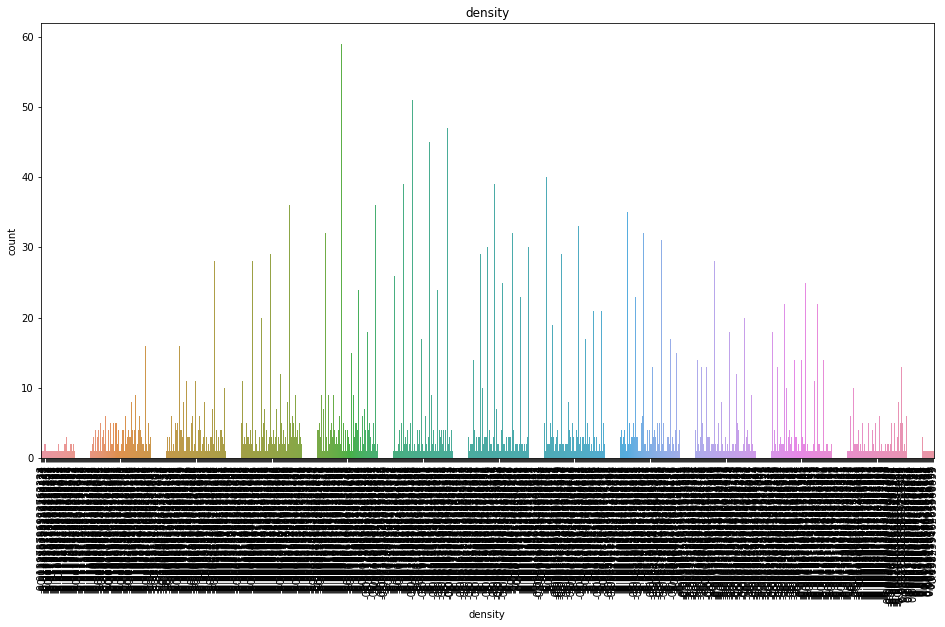

<Figure size 432x288 with 0 Axes>

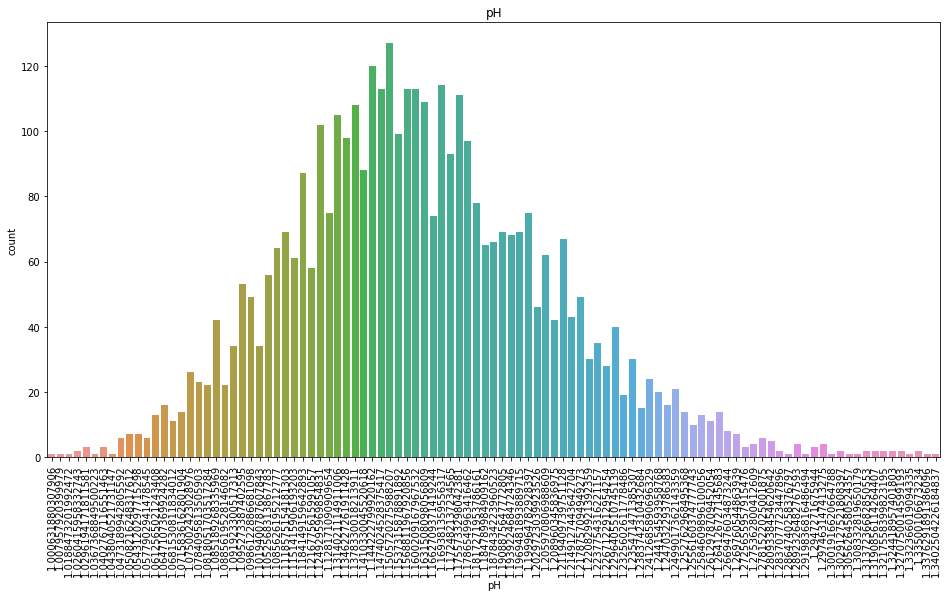

<Figure size 432x288 with 0 Axes>

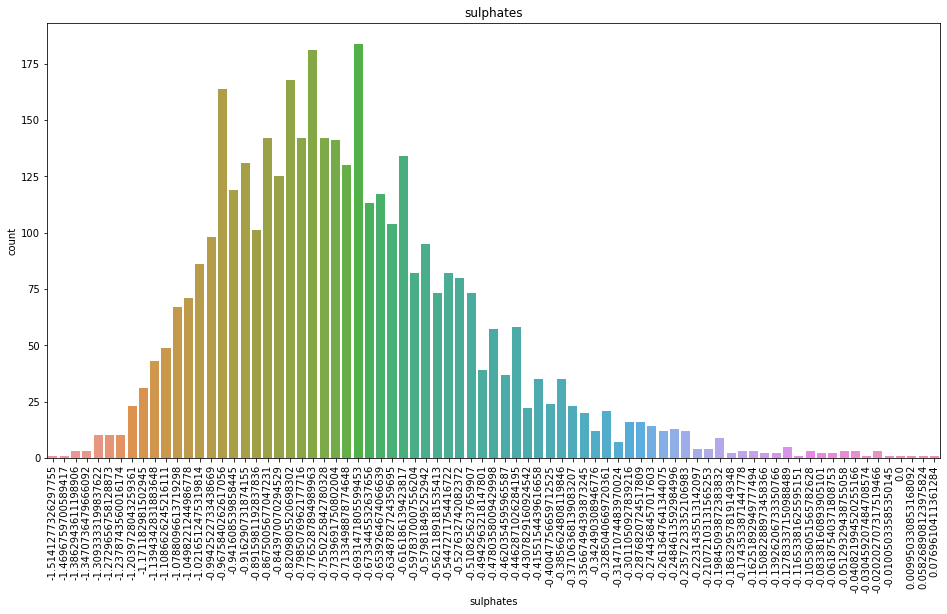

<Figure size 432x288 with 0 Axes>

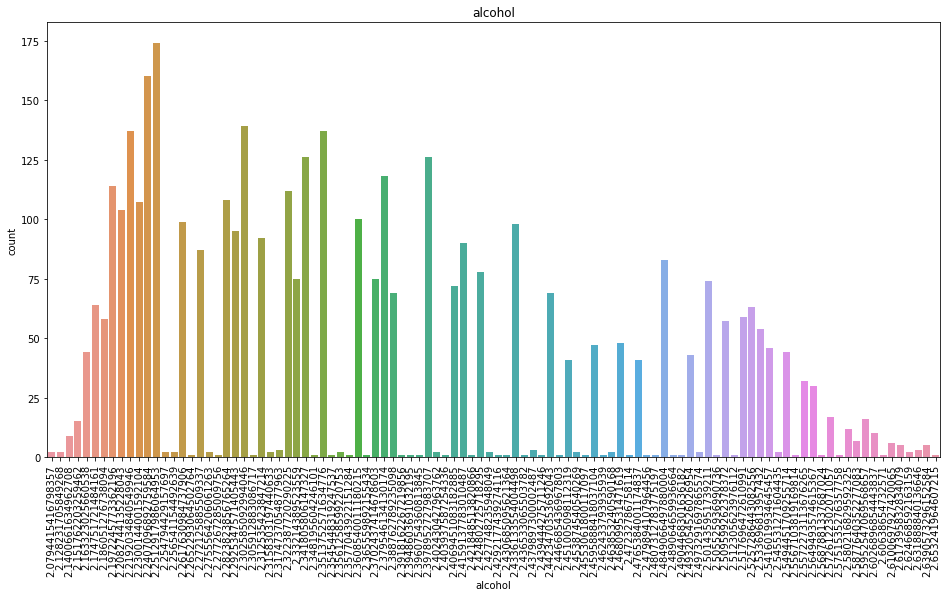

<Figure size 432x288 with 0 Axes>

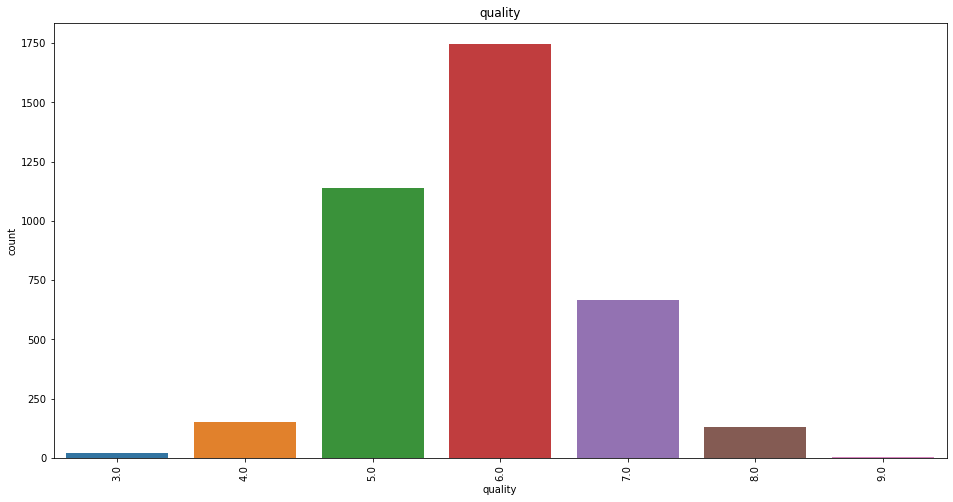

In [39]:
for i, var in enumerate(df_log.columns):
    plt.figure()
    fig, ax = plt.subplots(figsize=(16,8))
    g = sns.countplot(df_log[var],ax=ax)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    g.set_title(var)

The features seem to be less skewed than before. 
We will try to run a linear regression and see if there is a improvement

For LinearRegression,rmse = 0.7341386779595516


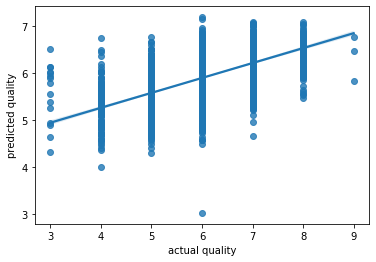

In [40]:
X_log = df_log.drop(['quality'],axis = 1)

y_log = df_log['quality']

# We seperate the data set into train set and test set using the sklearn medol train_test_split
from sklearn.model_selection import train_test_split

X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log,y_log,train_size=0.8,test_size=0.2,random_state = 40)

regression_model = LinearRegression()
regression_model.fit(X_log_train,y_log_train)
y_pred = regression_model.predict(X_log_train)
rmse = sqrt(mean_squared_error(y_log_train,y_pred))
print(f'For LinearRegression,rmse = {rmse}')

plot_df = pd.DataFrame.from_dict(data = {'actual quality': y_log_train, 'predicted quality': y_pred})
sns.regplot('actual quality', 'predicted quality', data = plot_df)

As comparing to the previous linear regression rmse , we have a slight improvement.
Then, we will try stack the log data with the original data and run the linear regression again.

For log stack,rmse = 0.7090575243929367


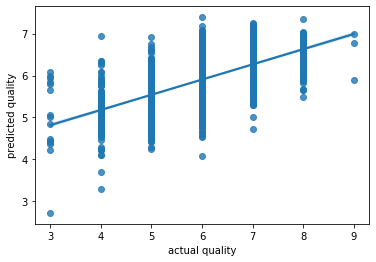

In [41]:
X_log_stack = pd.concat([X, X_log], axis=1)

y_log_stack = df['quality']


X_log_stack_train, X_log_stack_test, y_log_stack_train, y_log_stack_test = train_test_split(X_log_stack,y_log_stack,train_size=0.8,test_size=0.2,random_state = 40)

regression_model = LinearRegression()
regression_model.fit(X_log_stack_train,y_log_stack_train)
y_log_stack_pred = regression_model.predict(X_log_stack_train)
rmse = sqrt(mean_squared_error(y_log_stack_train,y_log_stack_pred))
print(f'For log stack,rmse = {rmse}')

plot_df = pd.DataFrame.from_dict(data = {'actual quality': y_log_stack_train, 'predicted quality': y_log_stack_pred})
sns.regplot('actual quality', 'predicted quality', data = plot_df)

The rmse reduces to 0.7090575243929367 showing that stacking the transformed data set helps. 
We will try to stack the sqaure root of the features as well.

For log and sqrt stack,rmse = 0.7054985199867084


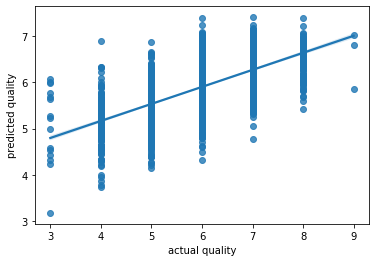

In [42]:
#make a copy of a new dataframe
df_sqrt = df.copy()

#take sqaure root for each feature column except the target column
for column in df.columns:
    if column != 'quality':
        df_sqrt[column] = np.sqrt(df_sqrt[column])

X_sqrt = df_sqrt.drop(['quality'],axis = 1)

X_log_sqrt_stack = pd.concat([X_log_stack, X_sqrt], axis=1)

y_log_sqrt_stack = df['quality']

X_log_sqrt_stack_train, X_log_sqrt_stack_test, y_log_sqrt_stack_train, y_log_sqrt_stack_test = train_test_split(X_log_sqrt_stack,y_log_sqrt_stack,train_size=0.8,test_size=0.2,random_state = 40)

regression_model = LinearRegression()
regression_model.fit(X_log_sqrt_stack_train,y_log_sqrt_stack_train)
y_log_sqrt_stack_pred = regression_model.predict(X_log_sqrt_stack_train)
rmse = sqrt(mean_squared_error(y_log_sqrt_stack_train,y_log_sqrt_stack_pred))
print(f'For log and sqrt stack,rmse = {rmse}')

plot_df = pd.DataFrame.from_dict(data = {'actual quality': y_log_sqrt_stack_train, 'predicted quality': y_log_sqrt_stack_pred})
sns.regplot('actual quality', 'predicted quality', data = plot_df)

There is a slight improvement. We will go ahead and cube root as well.

For log, sqrt and curt stack,rmse = 0.7005618685372041


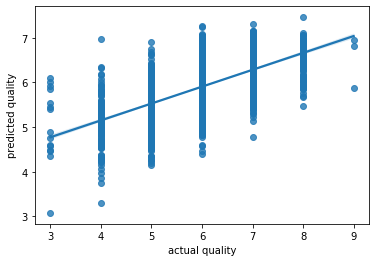

In [43]:
#make a copy of a new dataframe
df_cbrt = df.copy()

#take cube root for each feature column except the target column
for column in df.columns:
    if column != 'quality':
        df_cbrt[column] = np.cbrt(df_cbrt[column])

X_cbrt = df_cbrt.drop(['quality'],axis = 1)

X_stack = pd.concat([X_log_sqrt_stack, X_cbrt], axis=1)

y_stack = df['quality']

X_stack_train, X_stack_test, y_stack_train, y_stack_test = train_test_split(X_stack,y_stack,train_size=0.8,test_size=0.2,random_state = 40)

regression_model = LinearRegression()
regression_model.fit(X_stack_train,y_stack_train)
y_stack_pred = regression_model.predict(X_stack_train)
rmse = sqrt(mean_squared_error(y_stack_train,y_stack_pred))
print(f'For log, sqrt and curt stack,rmse = {rmse}')

plot_df = pd.DataFrame.from_dict(data = {'actual quality': y_stack_train, 'predicted quality': y_stack_pred})
sns.regplot('actual quality', 'predicted quality', data = plot_df)

It is making progress and we will stack a normalized feature lastly.

For log, sqrt, curt and normalize stack,rmse = 0.700561828117087


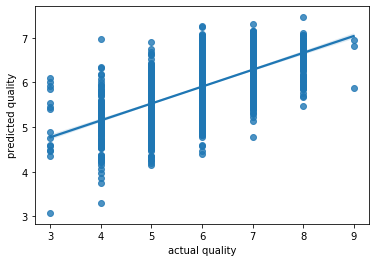

In [44]:
from sklearn.preprocessing import normalize
#make a copy of a new dataframe
df_normalize = df.copy()

#normalize each feature column except the target column
for column in df.columns:
    if column != 'quality':
        df_normalize[column] = normalize(df_normalize[column][:,np.newaxis], axis=0).ravel()

X_normalize = df_normalize.drop(['quality'],axis = 1)

X_normalize_stack = pd.concat([X_stack, X_normalize], axis=1)

y_normalize_stack = df_log['quality']

# We seperate the data set into train set and test set using the sklearn medol train_test_split
from sklearn.model_selection import train_test_split

X_normalize_stack_train, X_normalize_stack_test, y_normalize_stack_train, y_normalize_stack_test = train_test_split(X_normalize_stack,y_normalize_stack,train_size=0.8,test_size=0.2,random_state = 40)

regression_model = LinearRegression()
regression_model.fit(X_normalize_stack_train,y_normalize_stack_train)
y_normalize_stack_pred = regression_model.predict(X_normalize_stack_train)
rmse = sqrt(mean_squared_error(y_normalize_stack_train,y_normalize_stack_pred))
print(f'For log, sqrt, curt and normalize stack,rmse = {rmse}')

plot_df = pd.DataFrame.from_dict(data = {'actual quality': y_normalize_stack_train, 'predicted quality': y_normalize_stack_pred})
sns.regplot('actual quality', 'predicted quality', data = plot_df)

Adding the normalized features does not have signaficant effect. Therefore, I will not choose this one as my finally test choice. I will go back to the stack with log, sqrt and curt instead. 
Let us do the cross validation for the previous stack.

In [45]:
regression_model = LinearRegression()
regression_model.fit(X_stack_train,y_stack_train)

cv_stack = cross_validate(regression_model,X_stack_train,y_stack_train,cv=10)
print(f'This is the cross validation score of Linear regression:')
print(cv_stack['test_score'])
mean_csv = mean(cv_stack['test_score'])
print(f'This is the mean of the cross validation score: {mean_csv}')

This is the cross validation score of Linear regression:
[ 0.4327835   0.33912597  0.3507626   0.32235037 -0.31234968  0.36304817
  0.29184739  0.4478465   0.38328902  0.39664461]
This is the mean of the cross validation score: 0.30153484584691653


For the test set with stack log, sqrt and curt,rmse = 0.7139608279599252


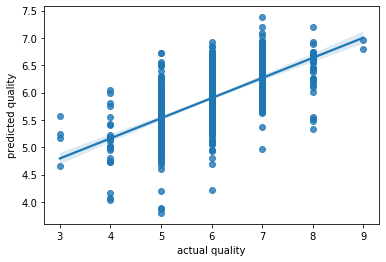

In [46]:
y_stack_test_pred = regression_model.predict(X_stack_test)
rmse = sqrt(mean_squared_error(y_stack_test,y_stack_test_pred))
print(f'For the test set with stack log, sqrt and curt,rmse = {rmse}')

plot_df = pd.DataFrame.from_dict(data = {'actual quality': y_stack_test, 'predicted quality': y_stack_test_pred})
sns.regplot('actual quality', 'predicted quality', data = plot_df)

The final performance is 0.7139608279599252 rmse with stacking the log, square root and cube root features. 